In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.utils import to_categorical

%matplotlib inline  


Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)


train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [4]:
pixels = train_images[4]
print('pixels.shape:', pixels.shape)
print('pixels:', pixels)


pixels.shape: (28, 28)
pixels: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0

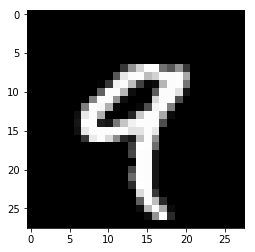

In [5]:
plt.imshow(pixels, cmap='gray')
plt.show()


In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


In [7]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)


train_images.shape: (60000, 28, 28, 1)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28, 1)
test_labels.shape: (10000,)


In [8]:
print('train label example:',train_labels[4])


train label example: 9


In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [10]:
print('train label example:',train_labels[4])


train label example: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )


In [13]:
EPOCHS = 4

history = model.fit(train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=EPOCHS, 
            batch_size=128
           )


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 58s 966us/step - loss: 0.1932 - acc: 0.9402 - val_loss: 0.0511 - val_acc: 0.9840
Epoch 2/4
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0475 - acc: 0.9852 - val_loss: 0.0374 - val_acc: 0.9869
Epoch 3/4
60000/60000 [==============================] - 59s 979us/step - loss: 0.0343 - acc: 0.9889 - val_loss: 0.0355 - val_acc: 0.9880
Epoch 4/4
60000/60000 [==============================] - 59s 987us/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0288 - val_acc: 0.9905


In [14]:
# list of values for (train) accuracy
acc_values = history.history['acc']

# list of values for validationaccuracy
val_acc_values = history.history['val_acc']


In [15]:
best_val_acc_value = max(val_acc_values)
print('best_val_acc_value:', best_val_acc_value)


best_val_acc_value: 0.9905


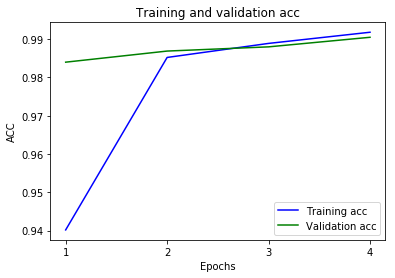

In [16]:
epochs = range(1, EPOCHS + 1) 

plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()
